In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)

In [3]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [4]:
df.index.freq='MS'

In [5]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [6]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [7]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


#### Here we notice the dataset goes upto December 1960. So forecasting should be made in the early 1960, like 2 to 3 yrs ahead like ex.1962,1965

## Performing the Train Test Split.

#### The train test split is indexing command.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [10]:
train_data= df.iloc[:109] # give rows 0 -->108
test_data= df.iloc[108:] # give rows 109 -->last

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 109 entries, 1949-01-01 to 1958-01-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  109 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


In [14]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 1958-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  36 non-null     int64
dtypes: int64(1)
memory usage: 576.0 bytes


## Fitting the Model to the Train Data

In [15]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [20]:
fitted_model= ExponentialSmoothing(train_data['Thousands of Passengers'],
                                   trend='mul',
                                  seasonal='mul',
                                  seasonal_periods=12).fit()

In [21]:
test_predictions = fitted_model.forecast(36)

In [22]:
test_predictions

1958-02-01    339.137622
1958-03-01    399.272453
1958-04-01    394.220606
1958-05-01    402.536027
1958-06-01    473.133366
1958-07-01    521.802945
1958-08-01    514.531957
1958-09-01    446.226218
1958-10-01    385.432456
1958-11-01    339.645779
1958-12-01    381.448514
1959-01-01    401.209020
1959-02-01    387.152183
1959-03-01    455.800806
1959-04-01    450.033726
1959-05-01    459.526432
1959-06-01    540.118829
1959-07-01    595.678969
1959-08-01    587.378566
1959-09-01    509.402210
1959-10-01    440.001365
1959-11-01    387.732284
1959-12-01    435.453383
1960-01-01    458.011549
1960-02-01    441.964567
1960-03-01    520.332353
1960-04-01    513.748779
1960-05-01    524.585447
1960-06-01    616.587986
1960-07-01    680.014242
1960-08-01    670.538680
1960-09-01    581.522557
1960-10-01    502.296052
1960-11-01    442.626798
1960-12-01    497.104174
1961-01-01    522.856089
Freq: MS, dtype: float64

# Plotting

## Plotting the training and testing data

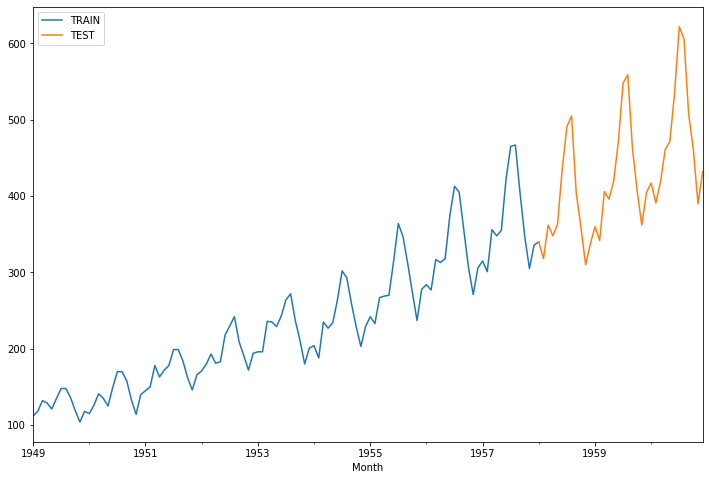

In [25]:
train_data['Thousands of Passengers'].plot(legend=True,label="TRAIN",figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True,label="TEST",figsize=(12,8))

### Plotting the Prediction Data.

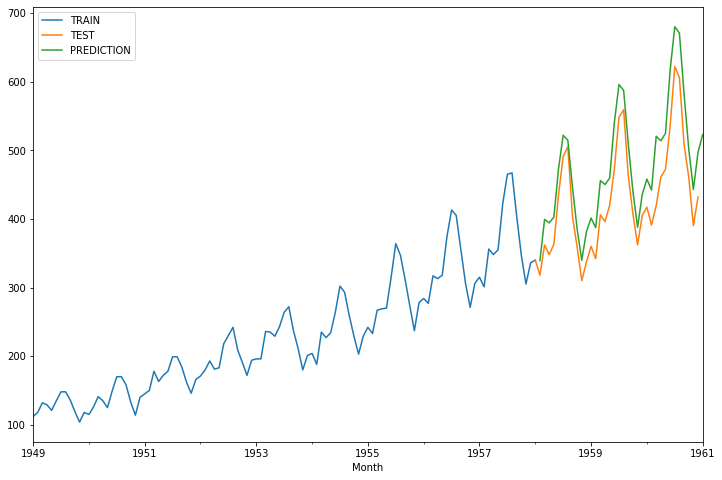

In [27]:
train_data['Thousands of Passengers'].plot(legend=True,label="TRAIN",figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True,label="TEST",figsize=(12,8))
test_predictions.plot(legend=True,label="PREDICTION",figsize=(12,8))

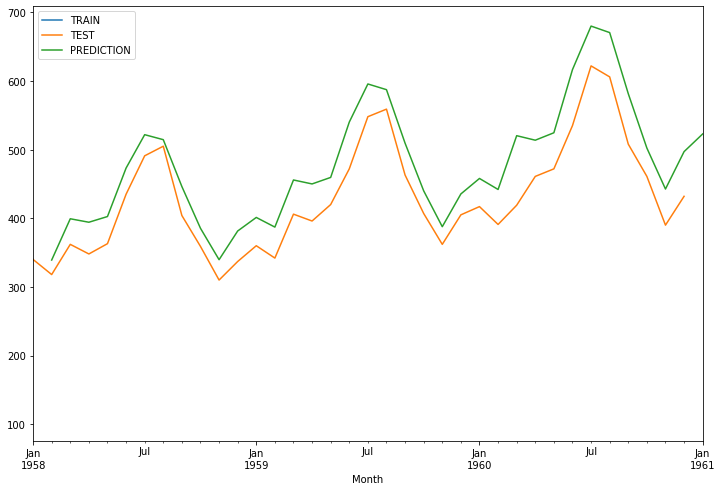

In [28]:
train_data['Thousands of Passengers'].plot(legend=True,label="TRAIN",figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True,label="TEST",figsize=(12,8))
test_predictions.plot(legend=True,label="PREDICTION",xlim=['1958-01-01','1961-01-01'])

# Evaluating Forecast Prediction

### Common Evaluation metrics for regression for continous values are:
    1.  Mean Absolute Error
    2.  Mean Squared Error
    3.  Root Mean Square Error

### for time series dataset we are predicting on continous values so these are used for continous values

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

#### Check the average values of test data.

In [32]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


### Mean Absolute Error 

In [30]:
mean_absolute_error(test_data,test_predictions)

63.0282862810754

### Mean Squared Error 

In [31]:
mean_squared_error(test_data,test_predictions)

5613.837862455122

### Root Mean Squared Error

#### Compare the RMSE to the standard Deviation.

In [33]:
np.sqrt(mean_squared_error(test_data,test_predictions))

74.92554879648945

# Forecast for Future datas

#### Those daat that is not present in the data set.

#### For this we need to fit the model to the entire dataset and not only the training data.

In [36]:
final_model= ExponentialSmoothing(df['Thousands of Passengers'],
                                   trend='mul',
                                  seasonal='mul',
                                  seasonal_periods=12).fit()

In [37]:
forecast_predictions= final_model.forecast(36)

# Plotting the Real Entire data with Predictions.

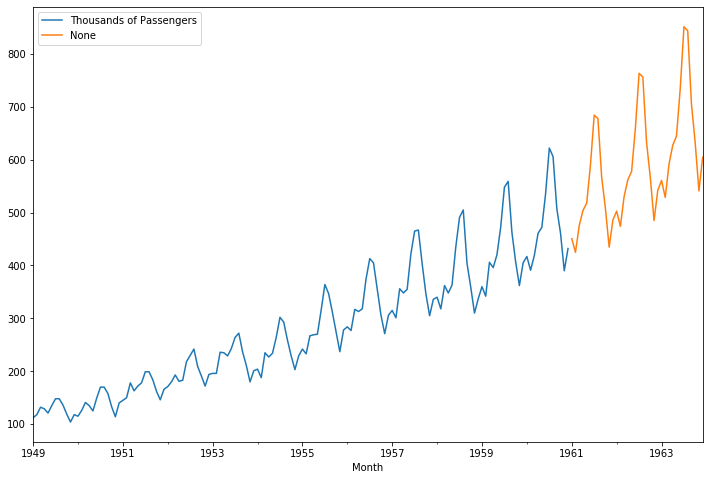

In [40]:
df['Thousands of Passengers'].plot(figsize=(12,8),legend='Real Data')
forecast_predictions.plot(figsize=(12,8),legend='Forecasted data')